# micro:bit data

## accelerator

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('microbito.csv')
df = df.drop('Time (seconds)', axis=1)
df

x     y     z target
0    1228   136 -1028      o
1    1432  -372  -308      o
2    -476  -456  -860      o
3     516  -784  -716      o
4    -368  -872   344      o
..    ...   ...   ...    ...
103   100  1144  1648      o
104   692   104  2040      o
105   -40   116   308      o
106  1740   260   872      o
107  1720   820 -1116      o

[108 rows x 4 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x       108 non-null    int64 
 1   y       108 non-null    int64 
 2   z       108 non-null    int64 
 3   target  108 non-null    object
dtypes: int64(3), object(1)
memory usage: 3.5+ KB


In [4]:
x = df
x

x     y     z target
0    1228   136 -1028      o
1    1432  -372  -308      o
2    -476  -456  -860      o
3     516  -784  -716      o
4    -368  -872   344      o
..    ...   ...   ...    ...
103   100  1144  1648      o
104   692   104  2040      o
105   -40   116   308      o
106  1740   260   872      o
107  1720   820 -1116      o

[108 rows x 4 columns]

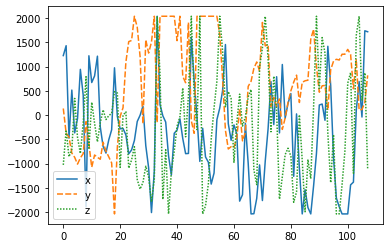

In [5]:
plt.figure()
sns.lineplot(data=x.iloc[:, :-1]);

In [6]:
df2 = pd.read_csv('microbitx.csv')
df2 = df2.drop('Time (seconds)', axis=1)
x2 = df2
x2

x     y     z target
0    600  -120   584      x
1    912 -1268 -1460      x
2    444 -1032    92      x
3    192  -760    36      x
4   -132  -808   204      x
..   ...   ...   ...    ...
94   768  -600  -236      x
95   916  -512  -588      x
96  1244    48   -32      x
97  1492  1112 -1312      x
98   100  1868 -1252      x

[99 rows x 4 columns]

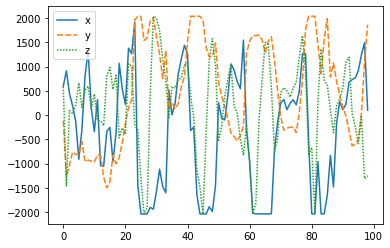

In [7]:
plt.figure()
sns.lineplot(data=x2.iloc[:, :-1]);

In [8]:
train = pd.concat([x, x2])
train.reset_index(drop=True, inplace=True)
train

x     y     z target
0    1228   136 -1028      o
1    1432  -372  -308      o
2    -476  -456  -860      o
3     516  -784  -716      o
4    -368  -872   344      o
..    ...   ...   ...    ...
202   768  -600  -236      x
203   916  -512  -588      x
204  1244    48   -32      x
205  1492  1112 -1312      x
206   100  1868 -1252      x

[207 rows x 4 columns]

* 타겟 인코딩

In [9]:
train.loc[train['target'] == 'o', 'target'] = 1
train.loc[train['target'] == 'x', 'target'] = 0
train

x     y     z target
0    1228   136 -1028      1
1    1432  -372  -308      1
2    -476  -456  -860      1
3     516  -784  -716      1
4    -368  -872   344      1
..    ...   ...   ...    ...
202   768  -600  -236      0
203   916  -512  -588      0
204  1244    48   -32      0
205  1492  1112 -1312      0
206   100  1868 -1252      0

[207 rows x 4 columns]

In [10]:
trainx = train.iloc[:, :-1]
trainy = train['target']

In [11]:
trainx

x     y     z
0    1228   136 -1028
1    1432  -372  -308
2    -476  -456  -860
3     516  -784  -716
4    -368  -872   344
..    ...   ...   ...
202   768  -600  -236
203   916  -512  -588
204  1244    48   -32
205  1492  1112 -1312
206   100  1868 -1252

[207 rows x 3 columns]

* 형변환 및 구조 변환
    * input으로 들어가기 위해서는 1차원 형태여야함
    * 값은 숫자이지만 object type이므로 정수형으로 변환

In [12]:
trainy = trainy.astype('int64').to_numpy().reshape(-1)
trainy

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(trainx, trainy, test_size = 0.2, random_state=3)

In [14]:
x_train.shape, x_test.shape

((165, 3), (42, 3))

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [16]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [17]:
def get_metrics(y_test, y_predicted):
    display(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_predicted, name='Predicted')).\
            style.background_gradient(cmap='Reds'))
    
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    
    print(f'\naccuracy \t= {round(accuracy, 2)} \
    \nprecision \t= {round(precision, 2)} \
    \nrecall \t\t= {round(recall, 2)} \
    \nf1-score \t= {round(f1, 2)}')

In [18]:
get_metrics(y_test, model.predict(x_test))


accuracy 	= 0.64     
precision 	= 0.66     
recall 		= 0.64     
f1-score 	= 0.64


## potentiometer

* 왼쪽부터 power, out, gnd
* 확장보드 기준
    * 위에서부터 data, power, gnd

In [19]:
df = pd.read_csv('anomaly.csv')
df

Time (seconds)    P
0               8.42  376
1               8.47  376
2               8.50  376
3               8.53  376
4               8.55  377
...              ...  ...
4012          126.81  872
4013          126.83  872
4014          126.86  876
4015          126.89  901
4016          126.92  957

[4017 rows x 2 columns]

In [20]:
df['P'] = pd.to_numeric(df['P'])

In [21]:
df['P']

0       376
1       376
2       376
3       376
4       377
       ... 
4012    872
4013    872
4014    876
4015    901
4016    957
Name: P, Length: 4017, dtype: int64

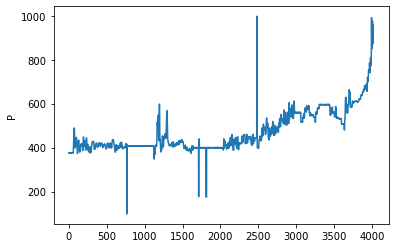

In [22]:
plt.figure()
sns.lineplot(data=df.P);

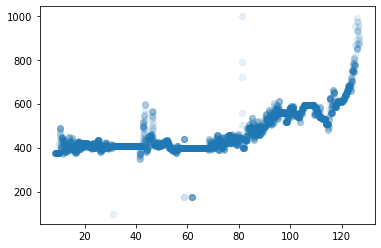

In [23]:
plt.scatter(df['Time (seconds)'],  df['P'], alpha=0.1);

In [24]:
from sklearn.neighbors import NearestNeighbors

In [25]:
x = df['P'].values.reshape(-1, 1)

In [42]:
knn = NearestNeighbors(n_neighbors = 20)
knn.fit(x)

NearestNeighbors(n_neighbors=20)

* indexes
    * 각 데이터에서 가장 가까운 n개의 데이터의 index
* distances
    * 각 데이터에서 가장 가까운 n개의 데이터의 거리

In [43]:
distances, indexes = knn.kneighbors(x)

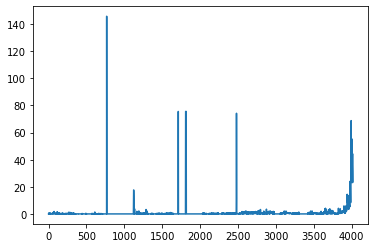

In [44]:
plt.plot(distances.mean(axis=1));

In [45]:
outlier_index = np.where(distances.mean(axis = 1) >= 1) 

In [46]:
outlier_values = df.iloc[outlier_index] 
outlier_values

Time (seconds)    P
65             10.30  475
66             10.33  483
72             10.50  485
73             10.53  472
112            11.65  374
...              ...  ...
4012          126.81  872
4013          126.83  872
4014          126.86  876
4015          126.89  901
4016          126.92  957

[400 rows x 2 columns]

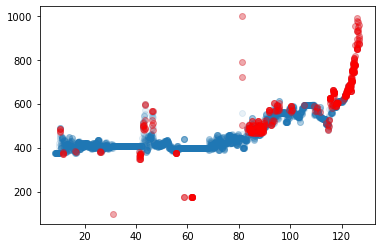

In [51]:
plt.scatter(df['Time (seconds)'],  df['P'], alpha=0.1);
plt.scatter(outlier_values['Time (seconds)'], outlier_values['P'], color = 'r', alpha=0.3);

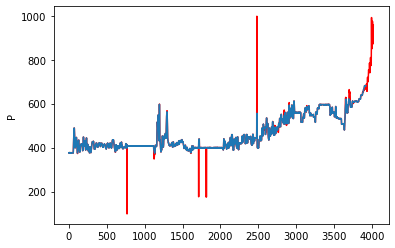

In [53]:
sns.lineplot(data=df.P, color = "r");
sns.lineplot(data=noutlier_values['P']);

# keyboard

## 라이브러리 설치

In [57]:
#pip install pynput

Note: you may need to restart the kernel to use updated packages.


## How to use

* 아래 셀을 가급적 실행하지 말 것
    * 주피터 노트북 상에도 동작은 하지만 웹에서 동작하는 것만큼 입력에 제한을 받음
* 파이썬이 설치되었다는 가정하에, 파이썬 파일 작성
* 실제 수업에선 직접 타이핑하고 확인하는 시간을 가져보면 시간 면에서 좋을듯함
    * 실제 인게임에서도 작동이 되는지 등
* 쓸데없는 입력을 방지하고자 게임 직전에 실행, 더블 모니터 이상이면 상관없음
* shift 입력하면 종료
    * 종료됨과 동시에 플로팅 및 파일 저장
    * 데이터는 덮어쓰기 형식으로 데이터가 누적되도록 함
* 채팅에 사용하는 타이핑은 안 받도록 플래그 처리해둠

Recording start..

'\x13' release
Key.ctrl_l release
's' release
'q' release
'q' release
'q' release
Key.shift release


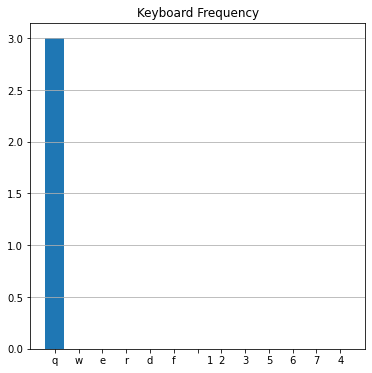

In [1]:
from pynput.keyboard import Key, Listener
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os


class main:
    def __init__(self):
        self.key_frequency = {'q': 0, 'w': 0, 'e': 0, 'r': 0, 'd': 0, 'f': 0, '\
        1': 0, '2': 0, '3': 0, '5': 0, '6': 0, '7': 0, '4': 0}
        self.flag = 1

    def on_release(self, key):
        data = str(key)[1:-1].lower()

        if key == Key.enter:
            self.flag *= -1

        if self.flag == 1 and data in self.key_frequency.keys():
            self.key_frequency[data] += 1

        print('{0} release'.format(key))
        if key == Key.shift:
            return False

    def convert_df(self):
        return pd.DataFrame(self.key_frequency, index=[0])

    def save_df(self):
        if not os.path.exists('key_freq.csv'):
            self.convert_df().to_csv('key_freq.csv', mode='w', index=False)
        else:
            self.convert_df().to_csv('key_freq.csv', mode='a', index=False, header=False)

    def visualize(self):
        key_df = self.convert_df()

        x = np.arange(len(key_df.columns))
        plt.figure(figsize=(6, 6))
        plt.title('Keyboard Frequency')
        plt.grid(axis='y')
        plt.xticks(x, key_df.columns)
        plt.bar(x, key_df.iloc[-1])
        plt.show()

    def run(self):
        print('Recording start..\n')
        with Listener(on_release=self.on_release) as listener:
            listener.join()
        self.save_df()
        self.visualize()


if __name__ == '__main__':
    main().run()

In [6]:
key_df = pd.read_csv('key_freq.csv')
key_df

q  w  e  r  d  f  1  2  3  5  6  7  4
0  0  0  0  0  0  0  0  0  0  0  0  0  0
1  3  0  0  0  0  0  0  0  0  0  0  0  0

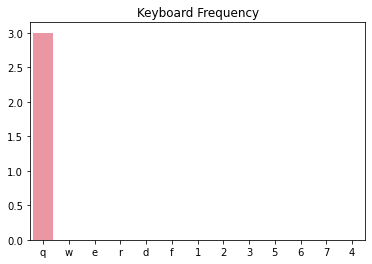

In [12]:
plt.title('Keyboard Frequency')
sns.barplot(x=key_df.columns, y=key_df.values.sum(axis=0))
plt.show()